In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import EDA
EDA

EDA lib ready


<module 'EDA' from 'f:\\Programacion\\1.BOOTCAMP\\Proyectos\\Oceans_7_Project\\EDA.py'>

In [3]:
kali = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\trabajo_interdisciplinar\TráficoNormal_kali_Clara_8jul2020.csv')
kali.head(1)

,No.,Arrival Time,Time,Time delta from previous captured frame,Source,Source Port,Source GeoIP,Destination,Destination Port,Destination GeoIP,Protocol,Length,Request Method,Arrival Time.1,Arrival Time.2,Info
0,1,"Jul 8, 2020 17:45:43.050968825 CEST",0.0,0.0,10.0.2.9,NaN,NaN,10.0.2.255,NaN,NaN,NBNS,92,NaN,"Jul 8, 2020 17:45:43.050968825 CEST","Jul 8, 2020 17:45:43.050968825 CEST",Name query NB EMPRESA<1c>


In [4]:
EDA.general_info(kali)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 16 columns):
No.                                        17007 non-null int64
Arrival Time                               17007 non-null object
Time                                       17007 non-null float64
Time delta from previous captured frame    17007 non-null float64
Source                                     17007 non-null object
Source Port                                16728 non-null float64
Source GeoIP                               9462 non-null object
Destination                                17007 non-null object
Destination Port                           16728 non-null float64
Destination GeoIP                          7418 non-null object
Protocol                                   17007 non-null object
Length                                     17007 non-null int64
Request Method                             101 non-null object
Arrival Time

In [5]:
col_names = ['index', 'date', 'time', 'duration', 'source',
       'src_port', 'src_geo', 'destination', 'dest_port',
       'dest_geo', 'protocol', 'length', 'request_method','arrival_time_1', 'arrival_time_2', 'info']

if len(kali.columns) == len (col_names):
       kali.columns = col_names
else:
       print(f'Longitud erronea: {len(kali.columns)} del df contra {len (col_names)} de la lista')
       pass

# kali_frame

In [6]:
kali_time = kali[['index','date', 'time', 'duration']]
kali_time

,index,date,time,duration
0,1,"Jul 8, 2020 17:45:43.050968825 CEST",0.000000,0.000000e+00
1,2,"Jul 8, 2020 17:45:43.728318228 CEST",0.677349,6.773494e-01
2,3,"Jul 8, 2020 17:45:44.413510872 CEST",1.362542,6.851926e-01
3,4,"Jul 8, 2020 17:46:03.848724881 CEST",20.797756,1.943521e+01
4,5,"Jul 8, 2020 17:46:03.848765610 CEST",20.797797,4.072900e-05
...,...,...,...,...
17002,17003,"Jul 8, 2020 17:49:32.474043222 CEST",229.423074,7.073900e-05
17003,17004,"Jul 8, 2020 17:49:32.475291497 CEST",229.424323,1.248275e-03
17004,17005,"Jul 8, 2020 17:49:32.475291616 CEST",229.424323,1.190000e-07
17005,17006,"Jul 8, 2020 17:49:32.475327260 CEST",229.424358,3.564400e-05


In [7]:
(kali.arrival_time_1 == kali.arrival_time_2).any()

True

In [8]:
info_time = kali_time['time'].describe()
info_time

count    17007.000000
mean       116.446142
std         55.463130
min          0.000000
25%         53.053953
50%        135.127543
75%        159.213869
max        229.424386
Name: time, dtype: float64

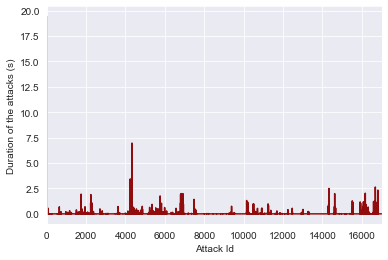

In [9]:
kali_time['duration'].plot(colors = 'darkred', alpha = 0.95)
plt.xlabel('Attack Id')
plt.ylabel('Duration of the attacks (s)')
# fig.savefig('test.jpg')
plt.show()

In [10]:
kali_time['date'].value_counts()

Jul  8, 2020 17:47:58.037945170 CEST    1
Jul  8, 2020 17:48:26.465741789 CEST    1
Jul  8, 2020 17:48:36.935996503 CEST    1
Jul  8, 2020 17:46:30.848922971 CEST    1
Jul  8, 2020 17:48:00.718241420 CEST    1
                                       ..
Jul  8, 2020 17:46:30.867563967 CEST    1
Jul  8, 2020 17:48:26.397452781 CEST    1
Jul  8, 2020 17:48:55.740755511 CEST    1
Jul  8, 2020 17:47:02.171378284 CEST    1
Jul  8, 2020 17:48:21.291955792 CEST    1
Name: date, Length: 17007, dtype: int64

# kali_ip

In [11]:
kali.columns

Index(['index', 'date', 'time', 'duration', 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo', 'protocol', 'length',
       'request_method', 'arrival_time_1', 'arrival_time_2', 'info'],
      dtype='object')

In [12]:
kali_local = kali[['index' , 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo']]
kali_local.head(2)

,index,source,src_port,src_geo,destination,dest_port,dest_geo
0,1,10.0.2.9,NaN,NaN,10.0.2.255,NaN,NaN
1,2,10.0.2.9,NaN,NaN,10.0.2.255,NaN,NaN


In [13]:
EDA.null_count(kali_local)

Presence of null in clolumns:
index          False
source         False
src_port        True
src_geo         True
destination    False
dest_port       True
dest_geo        True
dtype: bool

Number of null in columns:
index             0
source            0
src_port        279
src_geo        7545
destination       0
dest_port       279
dest_geo       9589
dtype: int64


In [14]:
EDA.value_counter(kali_local)


index:
2047     1
4711     1
2692     1
12931    1
14978    1
        ..
5432     1
11567    1
9518     1
15661    1
2049     1
Name: index, Length: 17007, dtype: int64
----------------

source:
10.0.2.12                    7426
74.125.168.39                2815
31.13.83.4                   1548
216.58.201.174                953
172.217.17.4                  669
104.16.37.47                  632
172.217.168.163               425
216.58.201.173                355
185.70.41.130                 297
172.217.16.246                287
31.13.83.36                   257
216.58.211.238                250
216.58.209.78                 213
216.58.211.227                107
80.58.61.254                   82
172.217.17.3                   67
216.58.211.226                 61
216.58.209.67                  56
104.17.214.67                  56
10.0.2.9                       56
fe80::2d94:75f1:ca9a:51b6      53
172.217.168.161                47
31.13.83.1                     42
104.18.27.18          

# kali_http

In [15]:
kali.columns

Index(['index', 'date', 'time', 'duration', 'source', 'src_port', 'src_geo',
       'destination', 'dest_port', 'dest_geo', 'protocol', 'length',
       'request_method', 'arrival_time_1', 'arrival_time_2', 'info'],
      dtype='object')

In [16]:
kali_protocol = kali[['index', 'protocol', 'length', 'request_method', 'info']]
kali_protocol.head()

,index,protocol,length,request_method,info
0,1,NBNS,92,NaN,Name query NB EMPRESA<1c>
1,2,NBNS,92,NaN,Name query NB EMPRESA<1c>
2,3,NBNS,92,NaN,Name query NB EMPRESA<1c>
3,4,DNS,75,NaN,Standard query 0x6432 A www.maxmind.com
4,5,DNS,75,NaN,Standard query 0x633f AAAA www.maxmind.com


In [17]:
EDA.null_count(kali_protocol)

Presence of null in clolumns:
index             False
protocol          False
length            False
request_method     True
info              False
dtype: bool

Number of null in columns:
index                 0
protocol              0
length                0
request_method    16906
info                  0
dtype: int64


In [18]:
EDA.null_count(kali_protocol)

Presence of null in clolumns:
index             False
protocol          False
length            False
request_method     True
info              False
dtype: bool

Number of null in columns:
index                 0
protocol              0
length                0
request_method    16906
info                  0
dtype: int64


In [19]:
EDA.value_counter(kali_protocol)


index:
2047     1
4711     1
2692     1
12931    1
14978    1
        ..
5432     1
11567    1
9518     1
15661    1
2049     1
Name: index, Length: 17007, dtype: int64
----------------

protocol:
TCP        11236
TLSv1.3     5446
DNS          164
SSDP          78
OCSP          46
LLMNR          8
DHCPv6         7
IGMPv3         6
ICMPv6         6
ARP            4
NBNS           3
DHCP           2
BROWSER        1
Name: protocol, dtype: int64
----------------

length:
1514    7798
54      5935
60       734
93       727
89        98
        ... 
1256       1
1336       1
1464       1
1512       1
1407       1
Name: length, Length: 626, dtype: int64
----------------

request_method:
NOTIFY      72
POST        23
M-SEARCH     6
Name: request_method, dtype: int64
----------------

info:
Application Data [TCP segment of a reassembled PDU]                                             2818
Application Data                                                                                1871
App

In [20]:
methods_info = kali_protocol['request_method'].value_counts()
blanks = len(kali.index) - methods_info.sum()
per = round(blanks*100 / len(kali.index), 2)
methods_info

NOTIFY      72
POST        23
M-SEARCH     6
Name: request_method, dtype: int64

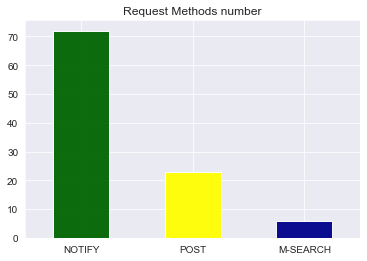

Aún faltan 16906 métodos de los 17007 registros proporcionados (99.41%)


In [21]:
# data
methods_info.plot(kind='bar', colors = ['darkgreen', 'yellow', 'darkblue'], alpha = 0.95)

# plot
plt.title('Request Methods number')
plt.xticks(rotation = -360)

plt.show()
print(f'Aún faltan {blanks} métodos de los {len(kali.index)} registros proporcionados ({per}%)')

In [22]:
kali_protocol['info'].value_counts().head(20)

Application Data [TCP segment of a reassembled PDU]                                         2818
Application Data                                                                            1871
Application Data, Application Data                                                           391
Application Data, Application Data, Application Data                                         130
NOTIFY * HTTP/1.1                                                                             72
Client Hello                                                                                  61
Change Cipher Spec, Application Data                                                          58
Server Hello, Change Cipher Spec                                                              39
Application Data, Application Data, Application Data, Application Data                        37
Response                                                                                      23
Request                       